In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
matplotlib.rcParams['figure.figsize'] = (20,10)

In [4]:
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [7]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
Not_important = ['area_type', 'society', 'balcony', 'availability']
df2 = df1.drop(Not_important, axis = 1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
###  For checking Null Values  ####
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

In [14]:
df2.shape

(13320, 5)

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['Bedroom'] = df3['size'].apply(lambda x: int(x.split(" ")[0]) ) 
df3.head()

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def is_float(number):
    try:
        float(number)
    except:
        return False
    return True


True

In [44]:
df3[~df3['total_sqft'].apply(is_float)].total_sqft.iloc[90]

'84.53Sq. Meter'

In [52]:
df3.shape

(13246, 6)

In [35]:
 def convert_sqft_to_num(x):
        tokens = x.split("-")
        if len(tokens) == 2 :
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x)
        except :
            return None
        

In [50]:
df3['total_sqft'].apply(convert_sqft_to_num)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [37]:
df4 = df3.copy()

In [38]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [39]:
df4.head()

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [45]:
df4['total_sqft'].iloc[90]

1450.0

In [51]:
df4.shape

(13246, 6)

In [54]:
df5 = df4.copy()


In [55]:
df5['price_per_sqft'] = ((df5['price'] * 100000) / df5['total_sqft'])
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [63]:
# how to count
df5.groupby('location')['location'].count()

(1304,)

In [62]:
df5['']

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [64]:
df6 = df5.groupby('location')['location'].count()

In [68]:
df6[df6 < 10].sort_values(ascending= False)

location
Yemlur                     9
Vishwanatha Nagenahalli    9
2nd Phase JP Nagar         9
Lingarajapuram             9
B Narayanapura             9
                          ..
MEI layout, Bagalgunte     1
M.G Road                   1
M C Layout                 1
Laxminarayana Layout       1
 Anekal                    1
Name: location, Length: 1051, dtype: int64

In [69]:
df5.location = df5.location.apply(lambda x: x.strip())
df5

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [70]:
location_stats = df5.groupby('location')['location'].count()

In [71]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [80]:
location_stat_less_than_10 = location_stats[location_stats < 10]
location_stat_less_than_10


location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1039, dtype: int64

In [82]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stat_less_than_10 else x)
len(df5.location.unique())

255

In [83]:
df5.head(10)

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
## Outlier Removal 


In [85]:
df5[(df5.total_sqft/df5.Bedroom) < 300].shape

(744, 7)

In [86]:
df6 = df5[~((df5.total_sqft/df5.Bedroom) < 300)]
df6

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [87]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

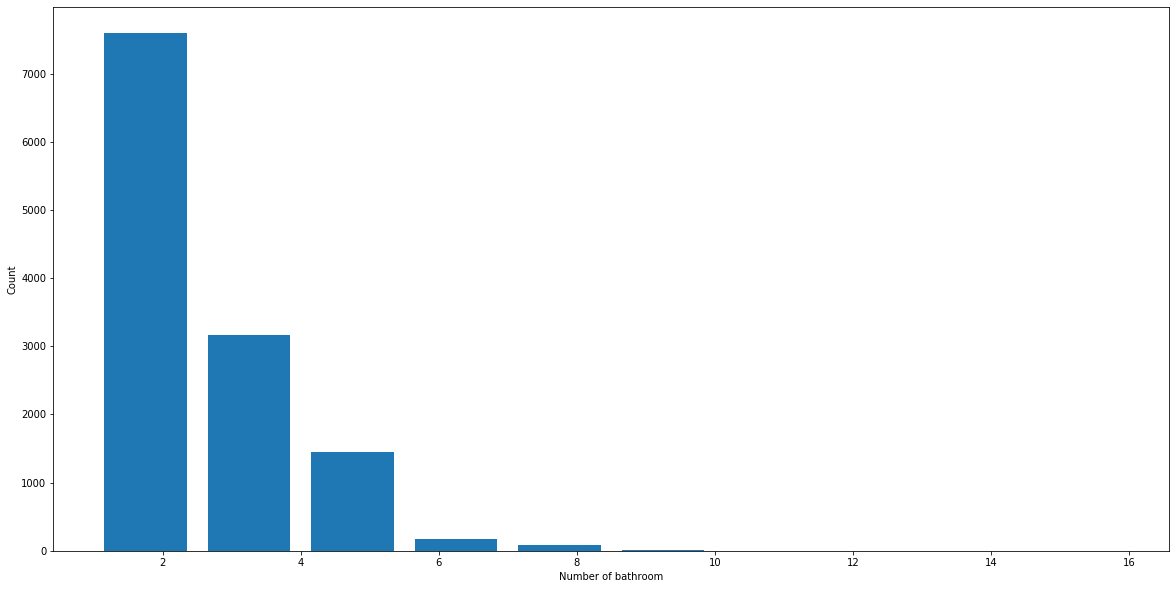

In [88]:
plt.hist(df6.bath, rwidth= 0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [90]:
df6[df6.bath > df6.Bedroom + 2]

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
1078,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,Sector 1 HSR Layout,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [93]:
df7 = df6[df6.bath < df6.Bedroom + 2]
df7.shape

(12349, 7)

In [94]:
df7.drop(['size', 'price_per_sqft'], axis = 'columns', inplace = True)
df7

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,location,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [97]:
dummies = pd.get_dummies(df7.location)

In [98]:
df11 = pd.concat([df7, dummies], axis = 'columns')
df11

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,other,3600.0,5.0,400.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df11 = df11.drop(['other'], axis = 'columns')

In [100]:
df11

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,other,3600.0,5.0,400.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df12 = df11.drop(['location'], axis = 'columns')
df12

,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,3600.0,5.0,400.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df12 = df12.dropna()
df12

,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,3600.0,5.0,400.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
test = df11.groupby('location').price.mean()
test

location
1st Block Jayanagar          254.100000
1st Block Koramangala        283.450000
1st Phase JP Nagar           159.891304
2nd Phase Judicial Layout     46.181818
2nd Stage Nagarbhavi         218.571429
                                ...    
Yelahanka                     82.092995
Yelahanka New Town            87.294872
Yelenahalli                   50.799231
Yeshwanthpur                  97.079313
other                        136.507476
Name: price, Length: 255, dtype: float64

In [156]:
test2 = df11.copy()
test2.head()

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
test2[test2.price != None]


,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,other,3600.0,5.0,400.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
new_column2 = list()
for i in range(len(test2)):
    l = test2.location.iloc[i]
    p_mean = test.loc[l]
    ans = test2.price.iloc[i] < (p_mean + p_mean/2) and (test2.price.iloc[i] > (p_mean - p_mean/2))
    new_column2.append(ans) 

len(new_column2)


12349

In [170]:
len(new_column)

12349

In [190]:
test4 = test2.copy()
test4['value'] = new_column2
test4 = test4[test4.value]
test4.shape

(8236, 260)

In [191]:
test4 = test4.dropna()

In [171]:
test2['value'] = new_column
test2.head()

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,value
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [177]:
test3 = test2[test2.value]
test3

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,value
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,Yeshwanthpur,1675.0,3.0,92.13,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
13310,Rachenahalli,1050.0,2.0,52.71,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13313,Uttarahalli,1345.0,2.0,57.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13314,Green Glen Layout,1715.0,3.0,112.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [182]:
test3 = test3.dropna()

In [183]:
x = test3.drop(['price', 'location'], axis = 'columns')
x

,total_sqft,bath,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,value
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
6,2732.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,1675.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
13310,1050.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13313,1345.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13314,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [193]:
x1 = test4.drop(['price', 'location'], axis = 'columns')
x1

,total_sqft,bath,Bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,value
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,1050.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13312,1262.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13313,1345.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
13314,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [194]:
y1 = test4.price
y1

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13310     52.71
13312     47.00
13313     57.00
13314    112.00
13317     60.00
Name: price, Length: 8215, dtype: float64

In [186]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = .2, random_state = 10) 

In [195]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = .2, random_state = 10) 

In [187]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
from sklearn.linear_model import LinearRegression
modelTest = LinearRegression()
modelTest.fit(X1_train, y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
modelTest.score(X1_test, y1_test)

0.7852429557700753

In [199]:
model.score(X_test,y_test)

0.8795322708991719

In [203]:
x.columns

Index(['total_sqft', 'bath', 'Bedroom', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'value'],
      dtype='object', length=258)

In [200]:
import pickle
with open('Banglore_house_price_model.pickle', 'wb') as f:
    pickle.dump(model,f)
    

In [204]:
## Getting the columns name
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
    